# MyCobot 280 Pi Gradio API Usage demo

This notebook contains a demo for using the Gradio API to access the MyCobot 280 Pi. It functions in the same way as the Hugging Face Space [here](https://huggingface.co/spaces/AccelerationConsortium/cobot280pi-gradio), allowing for programmatic access to the same functions.

This notebook explains the usage of all of the API endpoints. For more information, head to the Hugging Face Space, scroll all the way to the bottom and click the tiny "Use via API" button at the bottom of the screen.

### Links:
[MyCobot 280 Pi - Hugging Face space](https://huggingface.co/spaces/AccelerationConsortium/cobot280pi-gradio) <br>
[Device Setup Guide](#TODO Add device page link here)

In [ ]:
%pip install gradio_client

In [1]:
from gradio_client import Client 
import matplotlib.pyplot as plt
from PIL import Image
import json
import uuid

/Users/gursi/miniforge3/envs/mqtt/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First we define some helper functions for formatting the return values and images from the gradio API

In [9]:
def display_image(image_path):
	try:
		img = Image.open(image_path).convert("RGB")
		plt.imshow(img)
		plt.title("Cobot view")
		plt.show()
	except Exception as e:
		print(f"An error occurred: {e}")

def display_result(result):
	print(f"queue status: {result[-1].replace("\n", " ")}")
	print(f"response json: {None if result[0] is None else json.loads(result[0])}")
	if len(result) == 3:
		if result[1] is None:
			return
		display_image(result[1]['value'])

Now enter a unique user id in the cell below! You can also use the default generated UUID.

In [3]:
USER_ID = str(uuid.uuid4()) #@param {type:"string"}
print(f"Your user id: {USER_ID}")
client = Client("AccelerationConsortium/cobot280pi-gradio")

Your user id: e0a97d05-1143-44ea-8d24-a88f01a2e666
Loaded as API: https://accelerationconsortium-cobot280pi-gradio.hf.space ✔


Now, we can join the queue for access to the Cobot. Each user is allocated 2 minutes before the queue moves on to the next user. Executing the cell below will place you on the queue and display the wait time (if any).

When it is your turn to execute commands, the printed output of the cell below will indicate so.

In [20]:
print(client.predict(
	user_id=USER_ID,
	api_name="/enter_queue"
))

Your turn!
Time remaining: 76.13 seconds.


Now, we are ready to look at each of the functions that the cobot can execute!

## Query functions

This cell queries the current joint angles of 6 joints on the cobot. 

In [21]:
result = client.predict(
	user_id=USER_ID,
	api_name="/query_angles"
)
display_result(result)

queue status: Your turn! Time remaining: 75.73 seconds.
response json: {'success': True, 'angles': [0, 0, 0, 0, 0, 0], 'command': 'query/angles'}


This cell queries the current coordinates of the cobot in 3D space. These are structured in the [6-DoF format](https://en.wikipedia.org/wiki/Six_degrees_of_freedom) as (x, y, z, roll, pitch, yaw).

In [22]:
result = client.predict(
	user_id=USER_ID,
	api_name="/query_coords"
)
display_result(result)

queue status: Your turn! Time remaining: 74.96 seconds.
response json: {'success': True, 'coords': [0, 0, 0, 0, 0, 0], 'command': 'query/coords'}


This cell queries the current gripper position of the cobot, taking a value from 0 - 100.

In [23]:
result = client.predict(
	user_id=USER_ID,
	api_name="/query_gripper"
)
display_result(result)

queue status: Your turn! Time remaining: 71.66 seconds.
response json: {'success': True, 'position': 0, 'command': 'query/gripper'}


This cell queries what the cobot can currently see through the onboard camera.

queue status: Your turn! Time remaining: 68.44 seconds.
response json: {'success': True, 'command': 'query/camera'}


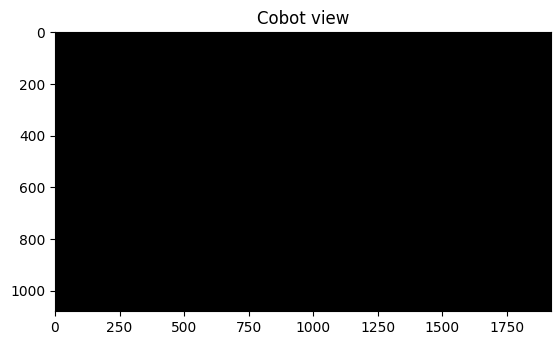

In [24]:
result = client.predict(
	user_id=USER_ID,
	api_name="/query_camera"
)
display_result(result)

## Control functions

This cell sends a set of 6 joint angles to the cobot. The cell prints out whether the command was sent successfully.

In [25]:
result = client.predict(
	user_id=USER_ID,
	angle0 = 0.0,
	angle1 = 0.0,
	angle2 = 0.0,
	angle3 = 0.0,
	angle4 = 0.0,
	angle5 = 0.0,
	movement_speed = 100,
	api_name="/control_angles"
)
display_result(result)

queue status: Your turn! Time remaining: 64.15 seconds.
response json: {'success': True, 'command': 'control/angles'}


This cell sends a set of coordinates to the cobot. The cell prints out whether the command was sent successfully.

In [26]:
result = client.predict(
	user_id=USER_ID,
	x = 0.0,
	y = 0.0,
	z = 0.0,
	roll = 0.0,
	pitch = 0.0,
	yaw = 0.0,
	movement_speed = 100,
	api_name="/control_coords"
)
display_result(result)

queue status: Your turn! Time remaining: 61.71 seconds.
response json: {'success': True, 'command': 'control/coords'}


This cell sends a gripper position to the cobot. The cell prints out whether the command was sent successfully.

In [27]:
result = client.predict(
	user_id=USER_ID,
	gripper_value = 100,
	movement_speed = 100,
	api_name="/control_gripper"
)
display_result(result)

queue status: Your turn! Time remaining: 58.51 seconds.
response json: {'success': True, 'command': 'control/gripper'}
